# PLOT cellphoneDB selected interactions - GRANULOSA-GERM cells

In [1]:
library(dplyr)
library(RColorBrewer)
library(ggplot2)
library(pheatmap)
library(cowplot)
library(reshape2)
library(plyr)

format_expression_values = function(celltypes){
    # subset matrixes with celltypes
    cells = intersect(celltypes, colnames(percent))
    c_percent = as.matrix(percent[, cells])
    c_avgLog2 = avgLog2[, cells]
    # scale avgLog2
    rn = colnames(c_avgLog2)
    avgLog2_scaled = apply(t(c_avgLog2), 2, scale) 
    avgLog2_scaled = t(avgLog2_scaled)
    colnames(avgLog2_scaled) = rn
    
    # format as dataframe for ggplot2
    m_avgLog2 = melt(avgLog2_scaled)
    m_avgLog2$zscore_expression = m_avgLog2$value
    m_percent = melt(c_percent)
    m_percent$percent = m_percent$value * 100
    m_percent$gene = m_percent$Var1
    m_percent$celltype = m_percent$Var2
    m_avgLog2$id = paste(m_avgLog2$Var1, m_avgLog2$Var2)
    m_percent$id = paste(m_percent$Var1, m_percent$Var2)
    mdf = merge(m_avgLog2, m_percent, by = 'id')
    mdf = mdf[ , c('celltype', 'gene', 'percent', 'zscore_expression', 'id') ]
    
    return(mdf)
}

dotplot_genes2lineageV2 = function(celltypes, genes2plot, mdf, percent_thr = NULL, legend_loc = 'bottom'){
    celltypes = unique(celltypes)
    genes2plot = unique(genes2plot)
    # order partners as in previous plot
    mdf = subset(mdf, gene %in% genes2plot)
    mdf = subset(mdf, celltype %in% celltypes)
    # order as in target genes
    plot_df = do.call(rbind, lapply(genes2plot, function(i) subset(mdf, gene == i)  ))                                    
    plot_df$gene = factor(plot_df$gene, levels = genes2plot)                                 
    plot_df$celltype = factor(plot_df$celltype, levels = celltypes)
    plot_df = unique(plot_df)
    if( ! is.null(percent_thr) ){
        plot_df$percent = round(plot_df$percent, digits = 0)
        plot_df = subset(plot_df, percent >= percent_thr)
    }
    percent_breaks = round_any(seq(0, 80, length.out = 5), accuracy = 10)                                
    P = ggplot(plot_df,  aes(x = gene,
                         y = celltype,
                         color = zscore_expression,
                         size = percent)) +  
                                      geom_point() + 
                                      scale_color_gradient2(low = brewer.pal(n = 5, name = 'Blues')[4], 
                                                            high = brewer.pal(n = 5, name = 'Reds')[4], 
                                                            mid = 'grey90', name="Mean expression (zscore)" )+
                                      labs(size="Fraction of cells",col="Mean expression (zscore)") +
                                     scale_size_continuous(breaks = percent_breaks)+
                                      theme_bw() + 
                                      theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
                                           axis.title=element_blank(),
                                           legend.position = legend_loc, 
                                            legend.box="vertical", legend.margin=margin(),legend.direction = "vertical",
                                            legend.key.height= unit(0.4, 'cm'),
                                            legend.key.width= unit(0.25, 'cm'),
                                           legend.text = element_text(size=5), legend.title = element_text(size=5),
#                                            legend.box.margin=margin(10,-10,10,-10)
                                           )
                                    
    return(P)
}
                                    
                                    
dotplot_genes2lineageV1 = function(celltypes, genes2plot, mdf, percent_thr = NULL, legend_loc = 'left'){
    celltypes = unique(celltypes)
    genes2plot = unique(genes2plot)
    # order partners as in previous plot
    mdf = subset(mdf, gene %in% genes2plot)
    mdf = subset(mdf, celltype %in% celltypes)
    # order as in target genes
    plot_df = do.call(rbind, lapply(genes2plot, function(i) subset(mdf, gene == i)  ))                                    
    plot_df$gene = factor(plot_df$gene, levels = genes2plot)                                 
    plot_df$celltype = factor(plot_df$celltype, levels = celltypes)
    plot_df = unique(plot_df)
    if( ! is.null(percent_thr) ){
        plot_df$percent = round(plot_df$percent, digits = 0)
        plot_df = subset(plot_df, percent >= percent_thr)
    }
    percent_breaks = round_any(seq(0, 80, length.out = 5), accuracy = 10)                                
    P = ggplot(plot_df,  aes(x = celltype,
                         y = gene,
                         color = zscore_expression,
                         size = percent)) +  
                                      geom_point() + 
                                      scale_color_gradient2(low = brewer.pal(n = 5, name = 'Blues')[4], 
                                                            high = brewer.pal(n = 5, name = 'Reds')[4], 
                                                            mid = 'grey90', name="Mean expression (zscore)" )+
                                      labs(size="Fraction of cells",col="Mean expression (zscore)") +
                                     scale_size_continuous(breaks = percent_breaks)+
                                      theme_bw() + 
                                      theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
                                           axis.title=element_blank(),
                                           legend.position = legend_loc, legend.margin=margin(),
                                            #legend.direction = "horizontal", legend.box="vertical", 
                                            legend.key.height= unit(0.4, 'cm'),
                                            legend.key.width= unit(0.25, 'cm'),
                                           legend.text = element_text(size=5), legend.title = element_text(size=5)
#                                            legend.box.margin=margin(10,-10,10,-10)
                                           )
    if (legend_loc == 'left')
        P = P + scale_y_discrete(position = "right")
                                    
    return(P)
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




## Load expression values for plotting

In [2]:
avgLog2 = read.csv('figures/data_utils/average_log.csv', stringsAsFactors = F, row.names=1)
colnames(avgLog2) = gsub('Germ.', '', colnames(avgLog2))
colnames(avgLog2) = gsub('Somatic.', '', colnames(avgLog2))
colnames(avgLog2) = gsub('Epi\\.', '', colnames(avgLog2))
colnames(avgLog2) = gsub('Endo\\.', '', colnames(avgLog2))

percent = read.csv('figures/data_utils/percent.csv', stringsAsFactors = F, row.names=1)
colnames(percent) = gsub('Germ.', '', colnames(percent))
colnames(percent) = gsub('Somatic.', '', colnames(percent))
colnames(percent) = gsub('Epi\\.', '', colnames(avgLog2))
colnames(percent) = gsub('Endo\\.', '', colnames(avgLog2))

## Prepare expression data for plotting

In [3]:
soma = c('CoelEpi_LHX9', 'early_supporting', 'Gi',  'Sertoli', 'FetalLeydig', 'Ti', 'early_sPAX8', 'late_sPAX8') 
epi = c('Epi_mesonephros', 'Epi_wolffian', 'Epi_Mullerian',
       'Arterial_EC', 'Fenestrated_EC', 'Glomerular_EC', 'Lymphatic_EC',  'Venous_EC',
       'pre_spermatogonia',  'GC', 'PGC') 

In [5]:
mdf_epi = format_expression_values(epi)
mdf_soma = format_expression_values(soma)

## PLOTS

In [6]:
outdir = 'cellphoneDB/plots/'

## Define genes to plot per microenviroment and lineage

In [7]:
ligands = c('CXCL14', 
            'SLIT1', 'SLIT2',
            'SST', 
            'SEMA3B', 'SEMA3C',  'VEGFA', 'VEGFB', 'PGF', 'SEMA4D',
            'IGFBP3')
receptors = c('CXCR4', 
              'ROBO1', 'ROBO2', 
            'SSTR2', 'SSTR3',
              'NRP2', 'PLXNB1', 
            'TMEM219')

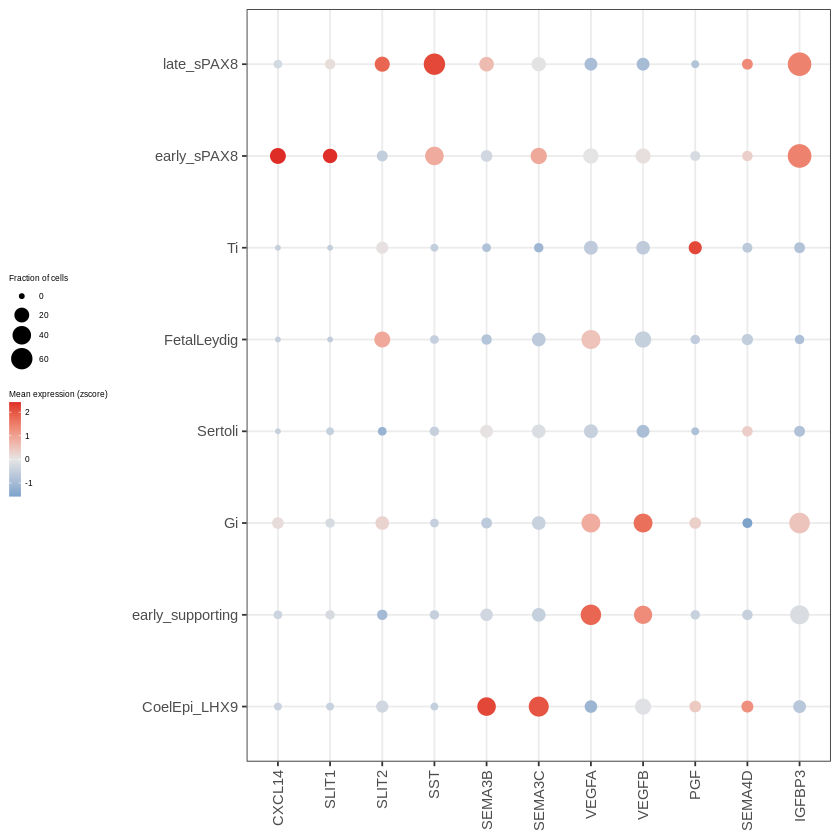

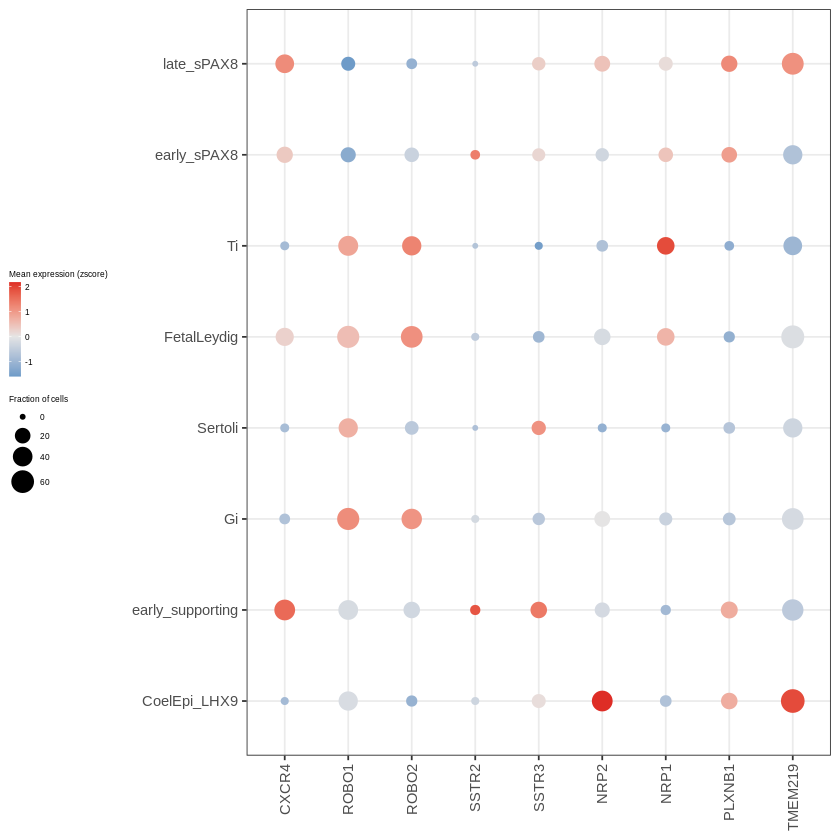

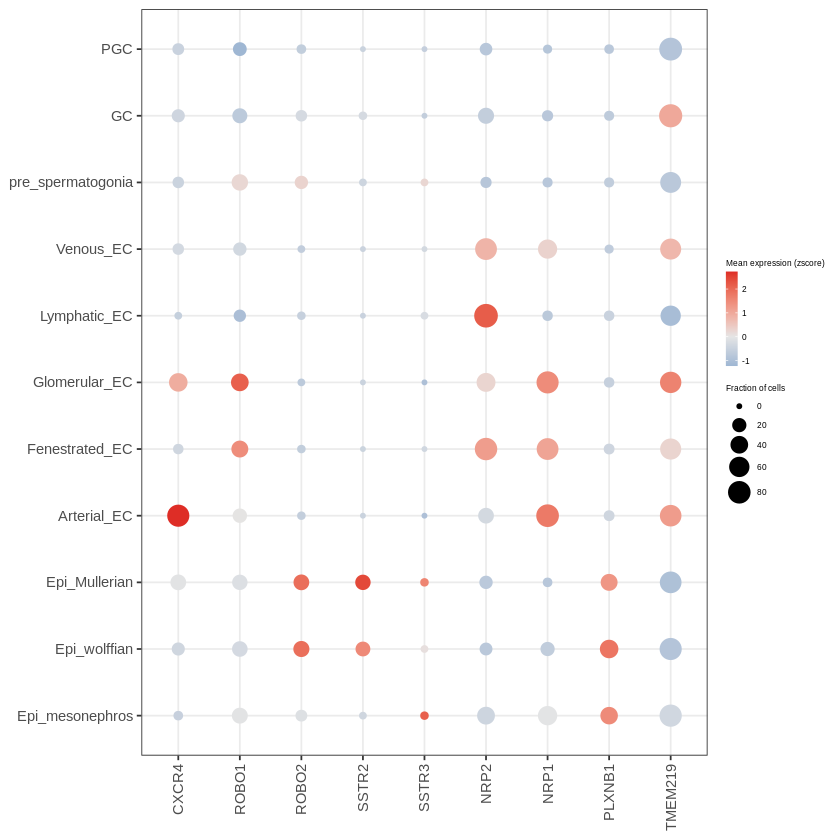

In [14]:
dotplot_genes2lineageV2(soma, ligands, mdf_soma, legend_loc='left')
ggsave(filename = paste0(outdir,'sPAX8_ligands.pdf'), dpi = 300, width = 3.5, height = 1.75)
dotplot_genes2lineageV2(soma, receptors, mdf_soma, legend_loc='left')
ggsave(filename = paste0(outdir,'sPAX8_receptors.pdf'), dpi = 300, width = 4.25, height = 2)


dotplot_genes2lineageV2(epi, receptors, mdf_epi, legend_loc='right')
ggsave(filename = paste0(outdir,'sPAX8_otherGonadal_receptors.pdf'), dpi = 300, width = 4.25, height = 2.75)

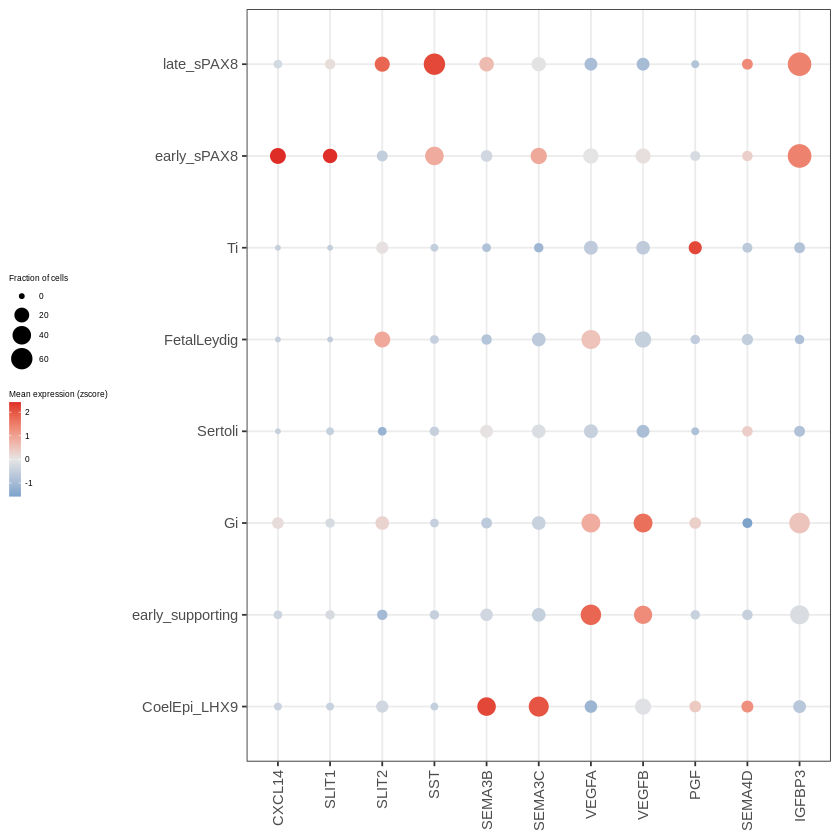

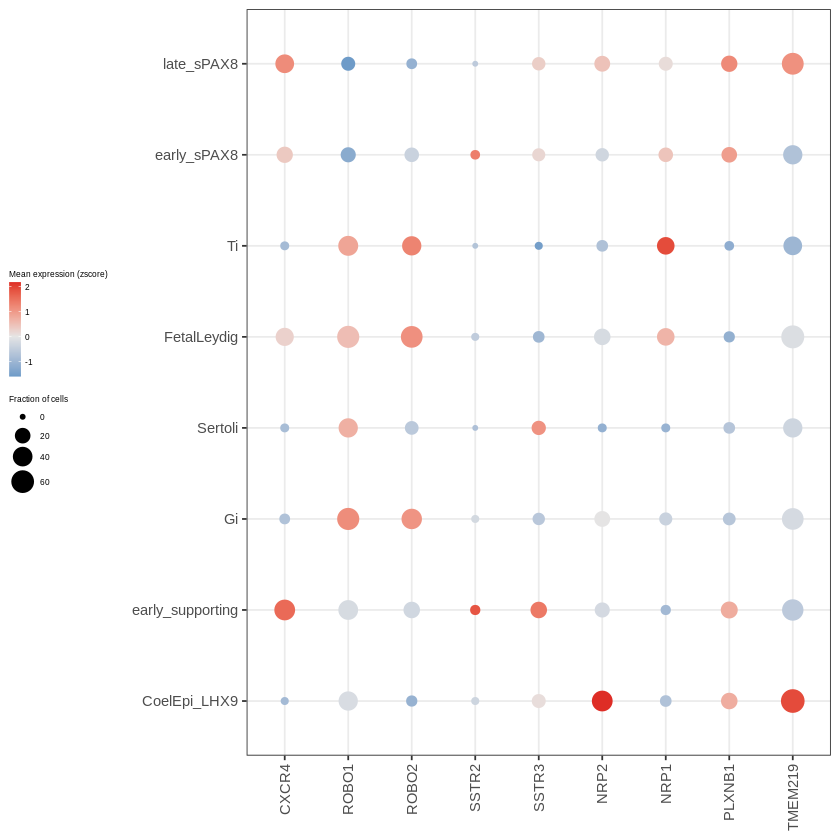

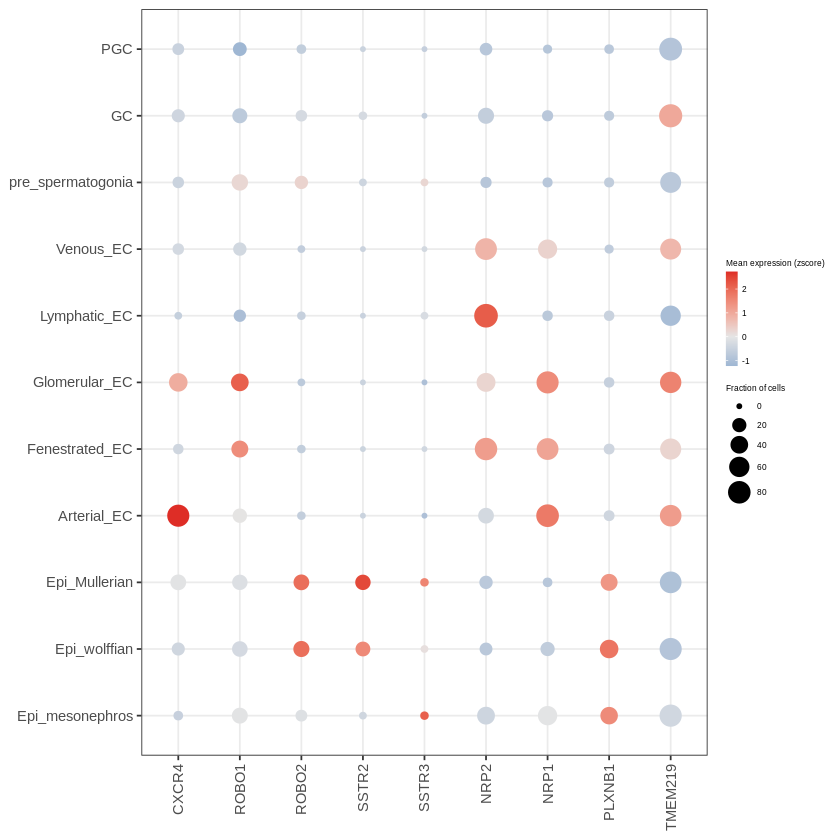

In [10]:
ligands = c('CXCL14', 
            'SLIT1', 'SLIT2',
            'SST', 
            'SEMA3B', 'SEMA3C',  'VEGFA', 'VEGFB', 'PGF', 'SEMA4D',
            'IGFBP3')
receptors = c('CXCR4', 
              'ROBO1', 'ROBO2', 
            'SSTR2', 'SSTR3',
              'NRP2', 'NRP1','PLXNB1', 
            'TMEM219')

dotplot_genes2lineageV2(soma, ligands, mdf_soma, legend_loc='left')
dotplot_genes2lineageV2(soma, receptors, mdf_soma, legend_loc='left')

dotplot_genes2lineageV2(epi, receptors, mdf_epi, legend_loc='right')

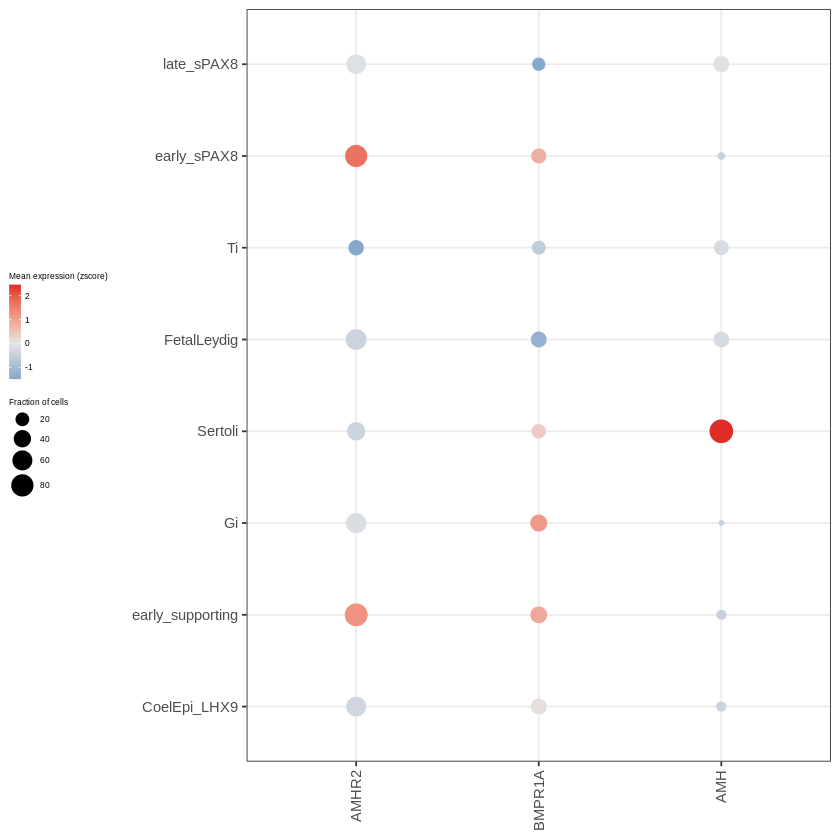

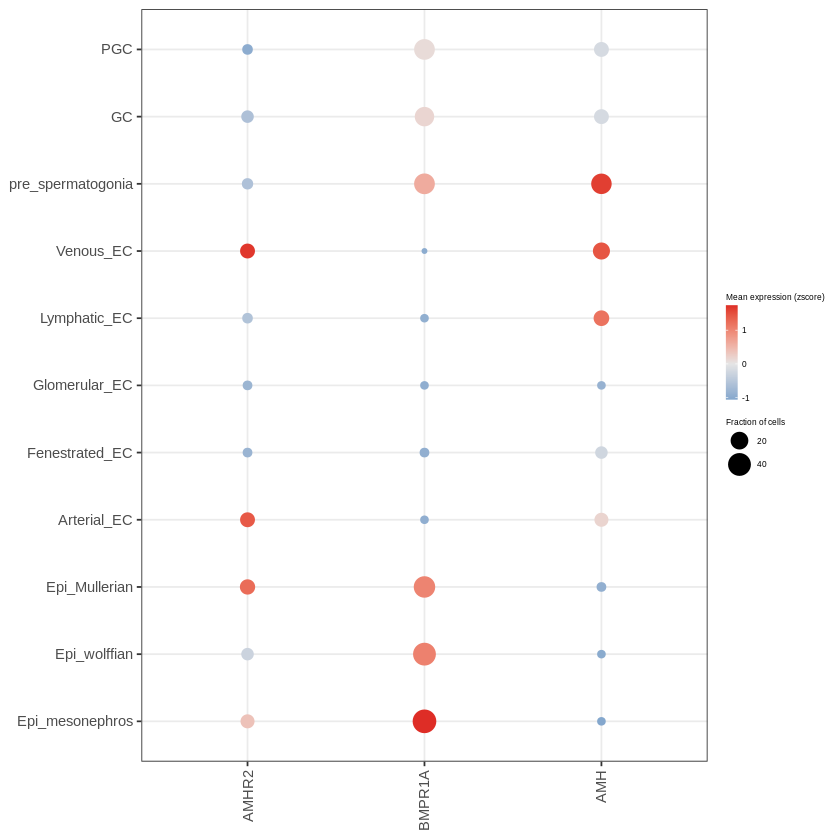

In [9]:
genes = c('AMHR2', 'BMPR1A','AMH')
dotplot_genes2lineageV2(soma, genes, mdf_soma, legend_loc='left')
dotplot_genes2lineageV2(epi, genes, mdf_epi, legend_loc='right')